# Credit Card Fraud Detection Project By Ahmed NANI & Anas TAMI & Rabie HATTABI

   In this Notebook, We are going to use machine learning models to predict fraudulent credit card transactions. This is critical from both the bank's and the customer's standpoints. Banks cannot afford to lose their clients' funds to scammers. Because the bank is accountable for the fraud transactions, every fraud represents a loss to the bank.

The dataset covers transactions done by European credit cardholders over the course of two days in September 2013. The dataset is heavily skewed, with the positive class (frauds) accounting for just 0.172 percent of all transactions.

# Exploratory Data Analysis (EDA)

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

#### Let's read the Data

In [244]:
df = pd.read_csv('C:\\Users\\pc\\Desktop\\Python Project\\creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#### Let's shape the data

In [245]:
df.shape

(284807, 31)

#### Let's understand the data

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [247]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Solving the problem of imbalanced data

In [248]:
import random
df = df.groupby('Class').sample(n=500, random_state=1, replace = True)

#### Let's handle the missing values

In [249]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


There are no missing values in any of the columns, as far as we can see. As a result, null values are not a concern across the dataset.

#### Let's check the distribution of the classes

In [250]:
classes = df['Class'].value_counts()
classes

0    500
1    500
Name: Class, dtype: int64

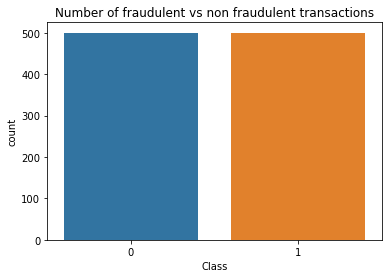

In [251]:
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non fraudulent transactions')
plt.show()

#### Let's observe the distribution of classes with time

In [252]:
data_fraud= df[df['Class']==1]
data_neg_fraud= df[df['Class']==0]

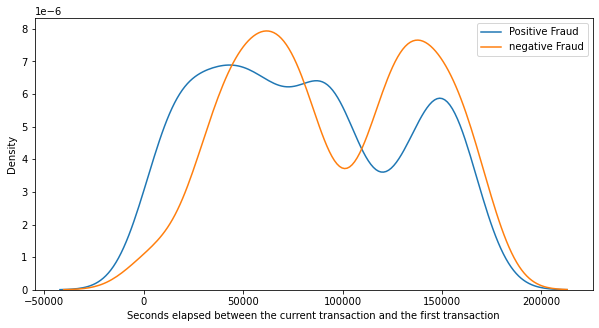

In [253]:
plt.figure(figsize=(10,5))
ax = sns.distplot(data_fraud['Time'],label='positive Fraud',hist=False)
ax = sns.distplot(data_neg_fraud['Time'],label='negative Fraud',hist=False)
ax.set(xlabel='Seconds elapsed between the current transaction and the first transaction')
plt.legend(['Positive Fraud', 'negative Fraud'])
plt.show()

##### Analysis

We cannot observe any specific difference between the two plots. So, We can drop the Time column.

In [254]:
#Dropping the Time column
df.drop('Time', axis=1, inplace=True)

#### Let's observe the distribution of classes with amount

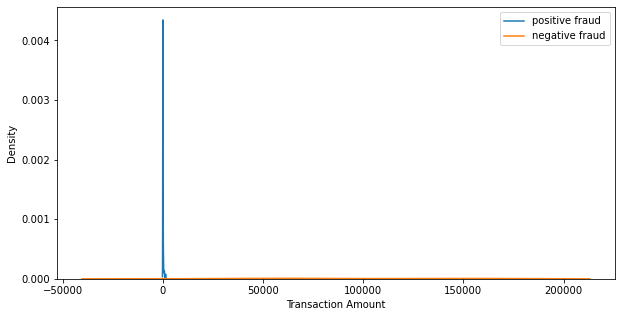

In [255]:
plt.figure(figsize=(10,5))
ax = sns.distplot(data_fraud['Amount'], label='positive fraud', hist=False)
ax = sns.distplot(data_neg_fraud['Time'], label='negative fraud', hist=False)
ax.set(xlabel='Transaction Amount')
plt.legend(['positive fraud', 'negative fraud'])
plt.show()

##### Analysis

We can observe that the fraudulent transactions are mostly densed in the lower value range, but non-fraudulent transactions are dispersed throughout the low to high amount range.

# Train Test Split

In [256]:
#importing library and defining feature & target variables
from sklearn.model_selection import train_test_split
X= df.drop(['Class'], axis=1)
y= df['Class']
#Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [257]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
123270,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,0.009872,-1.925278,...,-0.135789,-0.325284,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337,-0.417435
272433,1.961648,-0.755606,-1.157647,-0.623486,1.369823,4.065187,-1.677964,1.173519,1.144429,0.105208,...,-0.107647,0.245015,0.710489,0.298511,0.726147,-0.505524,0.325739,0.038479,-0.037272,-0.416952
26791,1.247339,1.231827,-1.608055,1.655805,0.752516,-1.852035,0.711062,-0.331864,-0.300775,-1.521992,...,-0.098095,-0.221805,-0.584886,-0.197435,0.028701,0.825606,-0.290703,0.033667,0.094851,-0.417435
9035,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,-0.417435
69980,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,-2.996669,...,0.002749,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,-0.421832


##### Let's scale the test set

we do not fit scale on the test set. We only transform it.

In [258]:
#Transforing the Test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
105008,1.197635,-0.123635,-1.200728,0.292578,2.152922,3.619084,-0.393989,0.840332,0.168453,-0.034109,...,0.030458,-0.162831,-0.498759,-0.156572,1.011622,0.880720,-0.330255,0.018915,0.018378,-0.235432
148774,0.084052,0.844449,0.650038,-0.507115,0.633558,-0.762991,1.048708,-0.375754,1.098719,-0.409608,...,0.017765,-0.400162,-0.590827,0.052423,0.012767,-0.574631,0.047372,0.052227,-0.140604,-0.382310
15736,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,-8.442262,...,1.640037,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,0.017747
83376,-0.869154,1.063008,0.531097,-0.434466,2.297790,3.836094,0.036158,0.900121,-0.515299,0.055713,...,0.164973,-0.218735,-0.682241,-0.208660,0.958966,0.234383,-0.553697,-0.617679,-0.437372,-0.377913
191359,1.177824,2.487103,-5.330608,5.324547,1.150243,-1.281843,-1.171994,0.413778,-2.659840,-2.971695,...,0.156057,0.262325,-0.431790,-0.092088,0.145216,0.457788,0.167739,0.451243,0.268421,-0.400422


# Model building

## Logistic Regression

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### Tuning Hyperparameter C

C is the Inverse of regularization strenght in Logistic Regression. High values of C correspond to less regularization.

In [260]:
#Libraries for Cross Validation CV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [261]:
#Let's creat KFold with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#Specify Parameters
params = {"C":[0.01, 0.1, 1, 10, 100, 1000]}

#The focus is on achieving higher sensitivity than accuracy, so we provide it as a reminder of the score.
model_cv = GridSearchCV(estimator = LogisticRegression(),
                       param_grid = params,
                       scoring = 'roc_auc',
                       cv = folds,
                       verbose = 1,
                       return_train_score = True)

#Fit model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [262]:
#Results of GridSearchCV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056049,0.026315,0.006782,0.000398,0.01,{'C': 0.01},0.984727,0.985119,0.976559,0.965961,...,0.980220,0.008167,1,0.984658,0.984848,0.986579,0.990244,0.983463,0.985959,0.002362
1,0.041287,0.007291,0.007181,0.001933,0.1,{'C': 0.1},0.980790,0.985276,0.972027,0.965647,...,0.978464,0.008483,2,0.987969,0.989501,0.988943,0.992393,0.987783,0.989318,0.001662
2,0.058842,0.014091,0.006385,0.001019,1,{'C': 1},0.979531,0.985432,0.963901,0.963922,...,0.975396,0.009582,5,0.989912,0.991779,0.990076,0.993281,0.991233,0.991256,0.001231
3,0.093350,0.012338,0.008379,0.002239,10,{'C': 10},0.980790,0.985276,0.967651,0.965020,...,0.974427,0.007664,6,0.991357,0.992336,0.990379,0.993584,0.993647,0.992261,0.001268
4,0.102926,0.008232,0.007977,0.002091,100,{'C': 100},0.981893,0.985119,0.973902,0.967059,...,0.975930,0.006646,4,0.991777,0.992727,0.990818,0.993867,0.994459,0.992730,0.001330
5,0.072006,0.014374,0.006583,0.002149,1000,{'C': 1000},0.981420,0.984179,0.976871,0.968941,...,0.976994,0.005439,3,0.992129,0.993099,0.991072,0.994072,0.995025,0.993079,0.001393


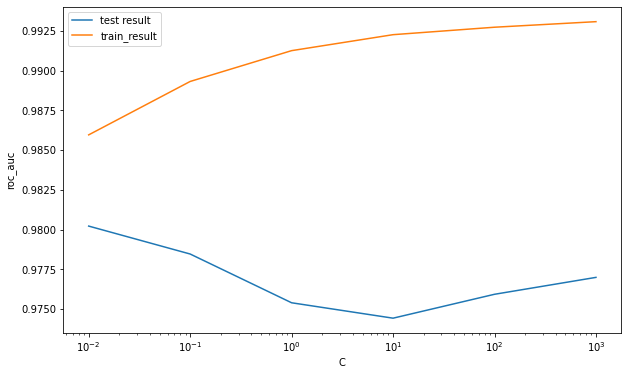

In [263]:
# plot of C versus train and validation scores

plt.figure(figsize=(10,6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result','train_result'], loc='upper left')
plt.xscale('log')

In [264]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print('The highest test roc_auc is {0} at C = {1}'.format(best_score, best_C))

The highest test roc_auc is 0.980219928266963 at C = 0.01


#### Logistic Regression With Optimal C

In [265]:
#Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

#Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

#### Prediction on the train set

In [266]:
#Predictions on the training set
y_train_pred = logistic_imb_model.predict(X_train)

In [267]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[387   7]
 [ 48 358]]


In [268]:
TP = confusion[1,1] #True Positive
TN = confusion[0,0] #True Negative
FP = confusion[0,1] #False positive
FN = confusion[1,0] #False negative

In [269]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

#Sensitivity
print("Sensitivity:", TP / float(TP+FN))

#Specificity
print("Specificity:", TN / float(TN+FP))

#F1 Score
print("F1 Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.93125
Sensitivity: 0.8817733990147784
Specificity: 0.9822335025380711
F1 Score: 0.9286640726329443


In [270]:
#Classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       394
           1       0.98      0.88      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



#### ROC on the train set

In [271]:
# ROC Curve funtion
def draw_ROC(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [272]:
#predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

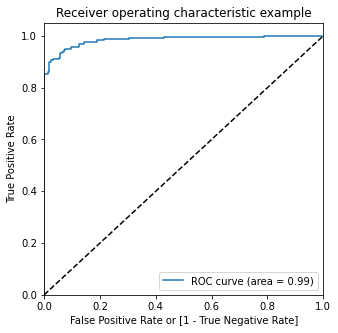

In [273]:
#plot the ROC curve
draw_ROC(y_train,y_train_pred_proba)

We acheived very good ROC 0.99 on the train set

#### Prediction on the test set

In [274]:
#prediction on the testing set
y_test_pred = logistic_imb_model.predict(X_test)

In [275]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[104,   2],
       [ 11,  83]], dtype=int64)

In [276]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Sensitivity:", TP / float(TP+FN))

#Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1 Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.935
Sensitivity: 0.8817733990147784
Specificity: 0.9822335025380711
F1 Score: 0.9273743016759776


In [277]:
#Classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       106
           1       0.98      0.88      0.93        94

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



#### ROC on the test set

In [278]:
#Prediction probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

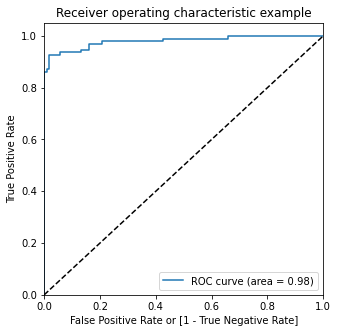

In [279]:
# plot the ROC curve
draw_ROC(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.98, which is almost close to 1.

***Model Summary***

- Train set
    - Accuracy: 0.93125
    - Sensitivity: 0.8817733990147784
    - Specificity: 0.9822335025380711
    - F1 Score: 0.9286640726329443
    - ROC: 0.99
- Test set
    - Accuracy: 0.935
    - Sensitivity: 0.8817733990147784
    - Specificity: 0.9822335025380711
    - F1 Score: 0.9273743016759776
    - ROC : 0.98
    
We can see that the Logistic regression model is performing well in the test set, what it had learnt from the train set.

## Decision Tree

In [280]:
#importing the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [281]:
#Let's create the parameter grid
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(50,150,50),
}

#Let's Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                          param_grid = param_grid,
                          scoring = 'roc_auc',
                          cv = 3,
                          verbose = 1)

#Let's fit the grid search to the Data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [282]:
# cross validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012304,0.002046,0.006313,0.002616,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.964049,0.960943,0.974640,0.966544,0.005863,4
1,0.015953,0.002151,0.007312,0.003290,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.973198,0.958361,0.973000,0.968186,0.006948,2
2,0.009976,0.002157,0.006314,0.002859,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.965284,0.955640,0.965055,0.961993,0.004493,5
3,0.011301,0.002618,0.006983,0.002445,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.964161,0.955527,0.963274,0.960988,0.003878,8
4,0.013961,0.001630,0.008645,0.003082,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.974096,0.960494,0.972576,0.969055,0.006086,1
5,0.010639,0.000939,0.007312,0.001244,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.970167,0.960606,0.972745,0.967840,0.005222,3
6,0.007313,0.000939,0.004655,0.001245,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963937,0.955415,0.964801,0.961384,0.004235,6
7,0.007644,0.000470,0.005986,0.000814,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.964161,0.955640,0.963783,0.961195,0.003931,7


In [283]:
# Printing the optimal sensitivity score and hyperparameters
print('Best roc_auc:', grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc: 0.9690552580470507
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [284]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = 'gini',
                                     random_state = 100,
                                     max_depth = 5,
                                     min_samples_leaf = 100,
                                     min_samples_split = 100)

#fit the model on the training set
dt_imb_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

#### Prediction on the train set

In [285]:
# Prediction on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [286]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[378,  16],
       [ 45, 361]], dtype=int64)

In [287]:
TP = confusion[1,1] # True positives
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [288]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train,y_train_pred))

#Sensitivity
print("Sensitivity:", TP / float(TP+FN))

#Specificity
print("Specificity:", TN / float(TN+FP))

#F1 Score
print("F1 Score:", f1_score(y_train,y_train_pred))

Accuracy: 0.92375
Sensitivity: 0.8891625615763546
Specificity: 0.9593908629441624
F1 Score: 0.9220945083014048


In [289]:
#Classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       394
           1       0.96      0.89      0.92       406

    accuracy                           0.92       800
   macro avg       0.93      0.92      0.92       800
weighted avg       0.93      0.92      0.92       800



In [290]:
# Predicted probability 
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [291]:
# roc auc
auc = metrics.roc_auc_score(y_train,y_train_pred_proba)
auc

0.9738347378160086

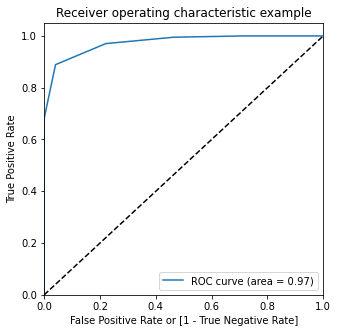

In [292]:
# draw the ROC curve
draw_ROC(y_train, y_train_pred_proba)

#### Prediction on the test set

In [293]:
# Predictions on the testing set
y_test_pred = dt_imb_model.predict(X_test)

In [294]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[98,  8],
       [10, 84]], dtype=int64)

In [295]:
TP = confusion[1,1] # True Positives
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [296]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Sensitivity:", TP / float(TP+FP))

#Specificity
print("Specificity:", TN / float(TN+FN))

#F1 Score
print("F1 Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.91
Sensitivity: 0.9130434782608695
Specificity: 0.9074074074074074
F1 Score: 0.9032258064516129


In [297]:
#Classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       106
           1       0.91      0.89      0.90        94

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [298]:
#Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [299]:
# roc auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9686872741870735

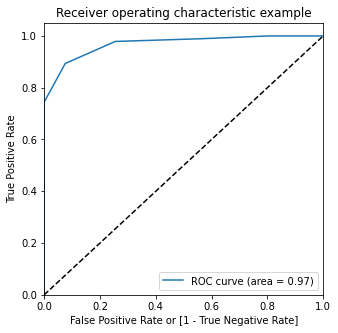

In [300]:
#plot the roc curve
draw_ROC(y_test, y_test_pred_proba)

***Model summary***
- Train set
    - Accuracy: 0.92
    - Sensitivity: 0.88
    - Specificity: 0.95
    - F1 Score: 0.92
    - Roc-Auc: 0.97
- Test set
    - Accuracy: 0.91
    - Sensitivity: 0.91
    - Specificity: 0.90
    - F1 Score: 0.90
    - Roc-Auc: 0.97

## KNN (K-Nearest Neighbors)

In [301]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

In [302]:
# On cherche un k optimal pour notre modele

In [303]:
neighbors = [x for x in range(0,50) if x % 2 != 0]
cv_scores=[]

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,scoring='accuracy')
    cv_scores.append(scores.mean())
    
# On bascule vers l'erreur

MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]

print(f"\n Le nombre k optimal est {optimal_k}.")


 Le nombre k optimal est 1.


In [230]:
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k)

knn_optimal.fit(X_train,y_train)

pred = knn_optimal.predict(X_test)

acc=accuracy_score(y_test,pred)*100
print('\n La precision du modele pour k=%d est %f%%'%(optimal_k,acc))


 La precision du modele pour k=1 est 95.500000%


In [232]:
from sklearn.metrics import confusion_matrix

#Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred)
confusion

array([[100,   6],
       [  3,  91]], dtype=int64)

In [233]:
TP = confusion[1,1] # True Positives
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [234]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, pred))

#Sensitivity
print("Sensitivity:", TP / float(TP+FP))

#Specificity
print("Specificity:", TN / float(TN+FN))

#F1 Score
print("F1 Score:", f1_score(y_test, pred))

Accuracy: 0.955
Sensitivity: 0.9381443298969072
Specificity: 0.970873786407767
F1 Score: 0.9528795811518325


In [235]:
#Classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       106
           1       0.94      0.97      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



ROC_AUC : 0.9557406663990365


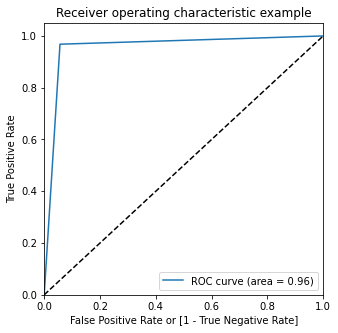

In [236]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, pred)

print(f'ROC_AUC : {roc_auc}')
draw_ROC(y_test, pred)

***Model summary***
- Test set
    - Accuracy: 0.955
    - Sensitivity: 0.93
    - Specificity: 0.97
    - F1 Score: 0.95
    - Roc-Auc: 0.96